In [2]:
import os

path = 'competition_data/'
os.listdir(path)

['sample_submission.csv', 'test.csv', 'train.csv']

In [3]:
import pandas as pd
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

print(train.shape)
print(test.shape)

(15000, 70)
(35452, 69)


In [4]:
from sklearn.preprocessing import LabelEncoder
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


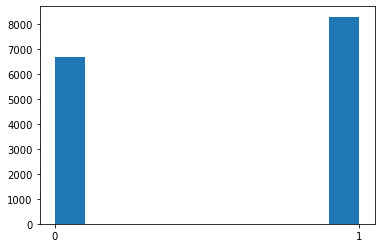

In [5]:
import matplotlib.pyplot as plt

train = train.drop(['index', 'country'],axis = 1)
test =test.drop(['index', 'country'],axis = 1)

y = train['nerdiness'].values
x = train.drop(['nerdiness'], axis = 1)
x = x.values
x = (x - x.min()) / (x.max() - x.min())

plt.hist(y)
plt.xticks([0,1])
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
import keras
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [7]:
print(x.shape)
print(x)
# print(x_train)
# print(y_train)

(15000, 67)
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [9]:
import pandas as pd
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')

print(train.shape)
print(test.shape)

(15000, 70)
(35452, 69)


In [10]:
train.describe()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
count,15000.000000,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000,...,14953.000000,15000.000000,14953.000000,14755.000000,14601.000000,14915.000000,14918.000000,14681.000000,14911.000000,15000.000000
mean,7499.500000,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418,...,1.346018,26.740867,1.185113,4.098340,1.847956,1.633121,1.179917,2.744091,1.938703,0.553533
std,4330.271354,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625,...,0.475715,317.058436,0.481993,3.425699,1.223191,0.481969,0.465985,24.109344,0.239882,0.497142
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3749.750000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,...,1.000000,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,7499.500000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,1.000000,20.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,11249.250000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,27.000000,1.000000,6.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000
max,14999.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,38822.000000,3.000000,12.000000,5.000000,2.000000,3.000000,2919.000000,2.000000,1.000000


In [11]:
train.columns

Index(['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

In [12]:
train = train.drop(['index', 'country'],axis = 1)
test =test.drop(['index', 'country'],axis = 1)

In [13]:
train.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'introelapse', 'testelapse',
       'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6',
       'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4',
       'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12',
       'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education', 'urban', 'gender',
       'engnat', 'age', 'hand', 'religion', 'orientation', 'voted', 'married',
       'familysize', 'ASD', 'nerdiness'],
      dtype='object')

Text(0.5, 0, '')

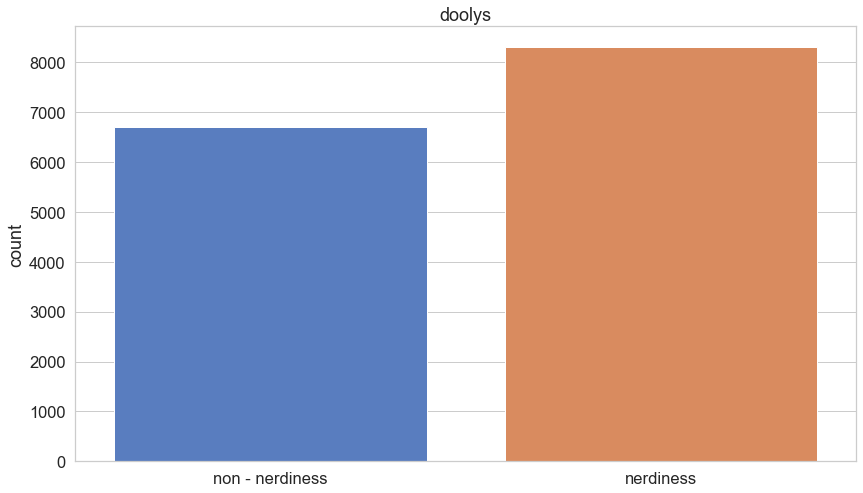

In [14]:
f = sns.countplot(x='nerdiness',data=train)
f.set_title("doolys")
f.set_xticklabels(['non - nerdiness','nerdiness'])
plt.xlabel("")

Text(0.5, 0, '')

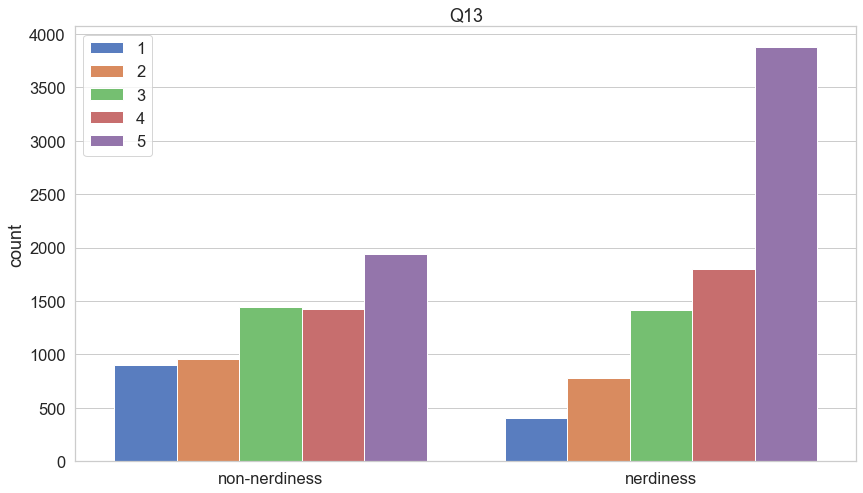

In [15]:
f = sns.countplot(x='nerdiness', data = train, hue = "Q13")
plt.legend(["1","2","3","4","5"])
f.set_title("Q13")
f.set_xticklabels(['non-nerdiness','nerdiness'])
plt.xlabel("")

[Text(0.5, 0, 'Q1'),
 Text(2.5, 0, 'Q3'),
 Text(4.5, 0, 'Q5'),
 Text(6.5, 0, 'Q7'),
 Text(8.5, 0, 'Q9'),
 Text(10.5, 0, 'Q11'),
 Text(12.5, 0, 'Q13'),
 Text(14.5, 0, 'Q15'),
 Text(16.5, 0, 'Q17'),
 Text(18.5, 0, 'Q19'),
 Text(20.5, 0, 'Q21'),
 Text(22.5, 0, 'Q23'),
 Text(24.5, 0, 'Q25'),
 Text(26.5, 0, 'introelapse'),
 Text(28.5, 0, 'surveyelapse'),
 Text(30.5, 0, 'TIPI2'),
 Text(32.5, 0, 'TIPI4'),
 Text(34.5, 0, 'TIPI6'),
 Text(36.5, 0, 'TIPI8'),
 Text(38.5, 0, 'TIPI10'),
 Text(40.5, 0, 'VCL2'),
 Text(42.5, 0, 'VCL4'),
 Text(44.5, 0, 'VCL6'),
 Text(46.5, 0, 'VCL8'),
 Text(48.5, 0, 'VCL10'),
 Text(50.5, 0, 'VCL12'),
 Text(52.5, 0, 'VCL14'),
 Text(54.5, 0, 'VCL16'),
 Text(56.5, 0, 'urban'),
 Text(58.5, 0, 'engnat'),
 Text(60.5, 0, 'hand'),
 Text(62.5, 0, 'orientation'),
 Text(64.5, 0, 'married'),
 Text(66.5, 0, 'ASD')]

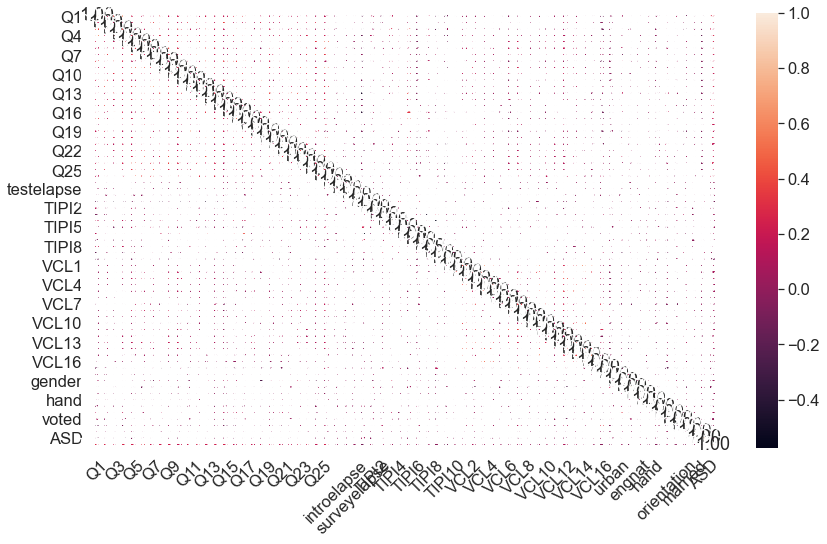

In [27]:
heat_map = sns.heatmap(train.corr(method='pearson'), annot=True, fmt='.2f', linewidths=4)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45)

In [16]:
train = train.drop(['age'],axis = 1)
test =test.drop(['age'],axis = 1)

In [24]:
train.shape

(15000, 67)

In [18]:
feature_columns = []

for header in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26','introelapse', 'testelapse',
       'surveyelapse','TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6',
       'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4',
       'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12',
       'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education', 'urban', 'gender',
       'engnat', 'hand', 'religion', 'orientation', 'voted', 'married',
       'familysize', 'ASD'] :
    feature_columns.append(tf.feature_column.numeric_column(header))

In [19]:
def create_dataset(dataframe, batch_size = 32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('nerdiness')
    return tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))\
            .shuffle(buffer_size = len(dataframe))\
            .batch(batch_size)

In [20]:
train_2, test_2 = train_test_split(train, test_size = 0.2, random_state = RANDOM_SEED)
train_ds = create_dataset(train_2)
test_ds = create_dataset(test_2)

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.DenseFeatures(feature_columns=feature_columns),
    tf.keras.layers.Dense(units=16,input_dim = 66, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [27]:
model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=100, use_multiprocessing=True, batch_size = 64)

Epoch 1/100
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


372/375 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.4463WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'Q1': <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=float64>, 'Q2': <tf.Tensor 'IteratorGetNext:12' shape=(None,) dtype=float64>, 'Q3': <tf.Tensor 'IteratorGetNext:20' shape=(None,) dtype=float64>, 'Q4': <tf.Tensor 'IteratorGetNext:21' shape=(None,) dtype=float64>, 'Q5': <tf.Tensor 'IteratorGetNext:22' shape=(None,) dtype=float64>, 'Q6': <tf.Tensor 'IteratorGetNext:23' shape=(None,) dtype=float64>, 'Q7': <tf.Tensor 'IteratorGetNext:24' shape=(None,) dtype=float64>, 'Q8': <tf.Tensor 'IteratorGetNext:25' shape=(None,) dtype=float64>, 'Q9': <tf.Tensor 'IteratorGetNext:26' shape=(None,) dtype=float64>, 'Q10': <tf.Tensor 'IteratorGetNext:2' shape=(None,) dtype=float64>, 'Q11': <tf.Tensor 'IteratorGetNext:3' shape=(None,) dtype=float64>, 'Q12': <tf.Tensor 'IteratorGetNext:4' shape=

375/375 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4460
Epoch 85/100
375/375 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4460
Epoch 86/100
375/375 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4460
Epoch 87/100
375/375 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4460
Epoch 88/100
375/375 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4460
Epoch 89/100
375/375 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4460
Epoch 90/100
375/375 [==============================] - 3s 9ms/step - loss: nan - accuracy: 0.4466 - val_loss: nan - val_accuracy: 0.4460
Epoch 91/100
375/375 [=========================

In [1]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pycaret.classification import *

In [28]:
train  = pd.read_csv('competition_data/train.csv')
test  = pd.read_csv('competition_data/test.csv')
submission = pd.read_csv('competition_data/sample_submission.csv')

In [18]:
train = train.drop(['index', 'country','religion','age','hand'],axis = 1)
test =test.drop(['index', 'country','religion','age','hand'],axis = 1)

In [19]:
clf = setup(data = train, target = 'nerdiness')

,Description,Value
0,session_id,4794
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 65)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,61
8,Ordinal Features,False
9,High Cardinality Features,False


In [20]:
best_3 = compare_models(sort = 'AUC', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7705,0.8595,0.8294,0.7729,0.8000,0.5317,0.5337,0.6500
rf,Random Forest Classifier,0.7666,0.8541,0.8254,0.7698,0.7965,0.5238,0.5258,0.4830
lightgbm,Light Gradient Boosting Machine,0.7447,0.8183,0.8041,0.7521,0.7771,0.4793,0.4810,0.1630
gbc,Gradient Boosting Classifier,0.7325,0.8017,0.7969,0.7400,0.7672,0.4539,0.4559,0.8480
lda,Linear Discriminant Analysis,0.7272,0.7969,0.7902,0.7364,0.7622,0.4433,0.4450,0.3440
ada,Ada Boost Classifier,0.7285,0.7935,0.7803,0.7426,0.7608,0.4474,0.4484,0.2230
lr,Logistic Regression,0.7116,0.7776,0.7666,0.7272,0.7462,0.4127,0.4138,0.6480
nb,Naive Bayes,0.4501,0.7570,0.0107,0.6638,0.0205,0.0046,0.0200,0.0450
dt,Decision Tree Classifier,0.6880,0.6839,0.7218,0.7164,0.7189,0.3682,0.3684,0.1030
knn,K Neighbors Classifier,0.5830,0.6015,0.6814,0.6102,0.6437,0.1446,0.1460,0.3430


In [15]:
best_3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=296, verbose=0,
                      warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1

In [21]:
blended = blend_models(estimator_list = best_3, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8452,0.8176,0.7674,0.7917,0.5145,0.5159
1,0.7810,0.8631,0.8305,0.7858,0.8075,0.5538,0.5550
2,0.7838,0.8588,0.8571,0.7757,0.8144,0.5571,0.5611
3,0.7610,0.8536,0.8279,0.7611,0.7931,0.5113,0.5138
4,0.7623,0.8493,0.8191,0.7669,0.7922,0.5152,0.5167
Mean,0.7700,0.8540,0.8304,0.7714,0.7998,0.5304,0.5325
Std,0.0102,0.0064,0.0142,0.0086,0.0094,0.0205,0.0209


In [22]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7816,0.8652,0.8392,0.7824,0.8098,0.5541,0.5560


In [23]:
final_model = finalize_model(blended)

In [24]:
predictions = predict_model(final_model, data=test)

In [25]:
predictions

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,urban,gender,engnat,orientation,voted,married,familysize,ASD,Label,Score
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,3,2.0,2.0,4.0,1.0,1.0,3.0,2.0,0,0.7246
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,2,1.0,1.0,5.0,2.0,1.0,5.0,2.0,1,0.7848
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,3,2.0,2.0,5.0,2.0,1.0,3.0,2.0,1,0.8879
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,2,1.0,1.0,2.0,2.0,1.0,3.0,2.0,1,0.6139
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,3,2.0,2.0,5.0,2.0,1.0,2.0,2.0,1,0.8164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,3,2.0,2.0,4.0,2.0,1.0,3.0,2.0,1,0.8238
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,2,3.0,1.0,5.0,2.0,1.0,2.0,2.0,1,0.7463
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,3,1.0,1.0,5.0,1.0,1.0,2.0,2.0,1,0.9079
35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,...,3,1.0,1.0,1.0,2.0,1.0,NaN,2.0,0,0.7081


In [26]:
submission['nerdiness'] = predictions['Score']

In [27]:
submission.to_csv('submission_vimlab_0818_2.csv', index = False)

In [30]:
train  = pd.read_csv('competition_data/train.csv')
test  = pd.read_csv('competition_data/test.csv')
submission = pd.read_csv('competition_data/sample_submission.csv')


train = train.drop(['index', 'country'],axis = 1)
test =test.drop(['index', 'country'],axis = 1)
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [33]:
clf = setup(data = train, target = 'nerdiness')

,Description,Value
0,session_id,779
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 68)"
5,Missing Values,True
6,Numeric Features,4
7,Categorical Features,63
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
train

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0
